# NE 630 - Lesson 34

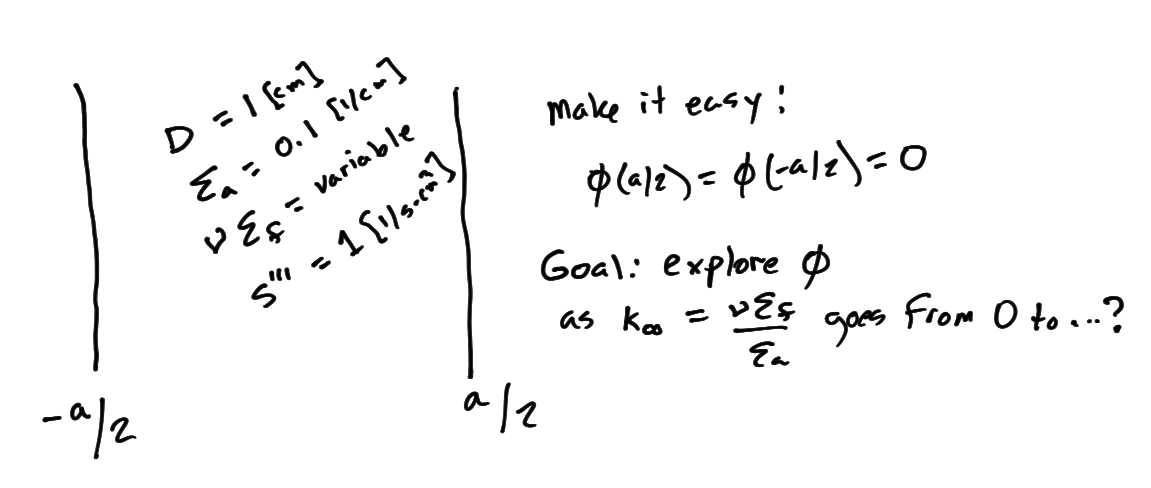

In [1]:
import sympy as sy
D, kappa, s, a, C1, C2 = sy.symbols("D, kappa, s''', a, C1, C2")
x = sy.symbols("x", real=True)
phi = sy.Function("phi")

In [2]:
nde = sy.Eq(-sy.diff(phi(x), x, 2)+kappa**2*phi(x), s/D)
nde

Eq(kappa**2*phi(x) - Derivative(phi(x), (x, 2)), s'''/D)

In [3]:
sy.dsolve(nde)

Eq(phi(x), C1*exp(-kappa*x) + C2*exp(kappa*x) + s'''/(D*kappa**2))

In [4]:
phi_sol = C1*sy.cosh(kappa*x)+C2*sy.sinh(kappa*x)+s/(D*kappa**2)
phi_sol

C1*cosh(kappa*x) + C2*sinh(kappa*x) + s'''/(D*kappa**2)

In [5]:
bcL = sy.Eq(phi_sol.subs(x, -a/2), 0)
bcR = sy.Eq(phi_sol.subs(x, a/2), 0)
coefs = sy.solve([bcL, bcR], C1, C2)
coefs[C1]

-s'''/(D*kappa**2*cosh(a*kappa/2))

In [6]:
bcL

Eq(C1*cosh(a*kappa/2) - C2*sinh(a*kappa/2) + s'''/(D*kappa**2), 0)

In [7]:
bcR

Eq(C1*cosh(a*kappa/2) + C2*sinh(a*kappa/2) + s'''/(D*kappa**2), 0)

In [8]:
phi_fin = phi_sol.subs(coefs)
phi_fin

s'''/(D*kappa**2) - s'''*cosh(kappa*x)/(D*kappa**2*cosh(a*kappa/2))

In [9]:
nde2 = sy.Eq(-sy.diff(phi(x), x, 2)-kappa**2*phi(x), s/D)
nde2

Eq(-kappa**2*phi(x) - Derivative(phi(x), (x, 2)), s'''/D)

In [10]:
sy.dsolve(nde2).rhs.rewrite(sy.cos).simplify()

-I*C1*sin(kappa*x) + C1*cos(kappa*x) + I*C2*sin(kappa*x) + C2*cos(kappa*x) - s'''/(D*kappa**2)

In [11]:
phi_sol = C1*sy.cos(kappa*x)+C2*sy.sin(kappa*x)-s/(D*kappa**2)
phi_sol

C1*cos(kappa*x) + C2*sin(kappa*x) - s'''/(D*kappa**2)

In [12]:
bcL2 = sy.Eq(phi_sol.subs(x, -a/2), 0)
bcR2 = sy.Eq(phi_sol.subs(x, a/2), 0)
coefs2 = sy.solve([bcL2, bcR2], C1, C2)
coefs2[C2]
phi_fin2 = phi_sol.subs(coefs2)
phi_fin2.simplify()

s'''*(-1 + cos(kappa*x)/cos(a*kappa/2))/(D*kappa**2)

In [13]:
k_oo, L = sy.symbols("k_{\infty}, L")
phi_fin2.subs(kappa, (k_oo - 1)/L**2)
phi_fin2

-s'''/(D*kappa**2) + s'''*cos(kappa*x)/(D*kappa**2*cos(a*kappa/2))